In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

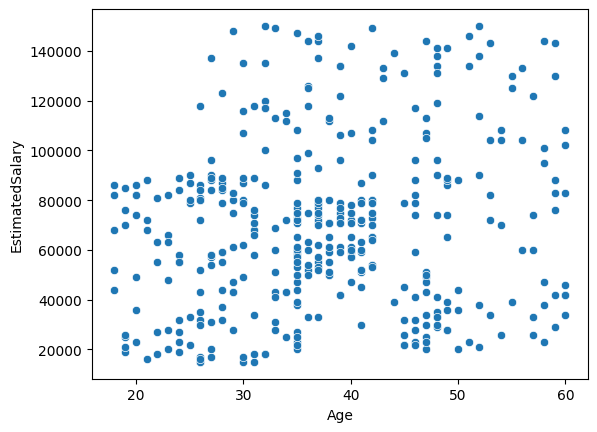

In [7]:
sns.scatterplot(x = df.iloc[:,0],y=df.iloc[:,1])

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

In [14]:
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100


10/10 [==============================] - 1s 41ms/step - loss: 651.1365 - accuracy: 0.4969 - val_loss: 409.6021 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 230.7469 - accuracy: 0.4719 - val_loss: 151.7851 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 80.6227 - accuracy: 0.5406 - val_loss: 29.0617 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 55.0974 - accuracy: 0.5219 - val_loss: 77.5295 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 41.7756 - accuracy: 0.5781 - val_loss: 64.2805 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 42.8495 - accuracy: 0.5844 - val_loss: 79.8755 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 42.7261 - accuracy: 0.4906 - val_loss: 47.9645 - val_accuracy:

10/10 [==============================] - 0s 11ms/step - loss: 138.3090 - accuracy: 0.5469 - val_loss: 106.4281 - val_accuracy: 0.6000
Epoch 55/100
10/10 [==============================] - 0s 11ms/step - loss: 72.5980 - accuracy: 0.5281 - val_loss: 42.4257 - val_accuracy: 0.4000
Epoch 56/100
10/10 [==============================] - 0s 11ms/step - loss: 28.6028 - accuracy: 0.4594 - val_loss: 1.8364 - val_accuracy: 0.6000
Epoch 57/100
10/10 [==============================] - 0s 11ms/step - loss: 12.7585 - accuracy: 0.5656 - val_loss: 24.5807 - val_accuracy: 0.4000
Epoch 58/100
10/10 [==============================] - 0s 12ms/step - loss: 18.0278 - accuracy: 0.5437 - val_loss: 18.1087 - val_accuracy: 0.6000
Epoch 59/100
10/10 [==============================] - 0s 11ms/step - loss: 47.8753 - accuracy: 0.5125 - val_loss: 10.4269 - val_accuracy: 0.6000
Epoch 60/100
10/10 [==============================] - 0s 11ms/step - loss: 19.6165 - accuracy: 0.5281 - val_loss: 29.0145 - val_accuracy: 0.60

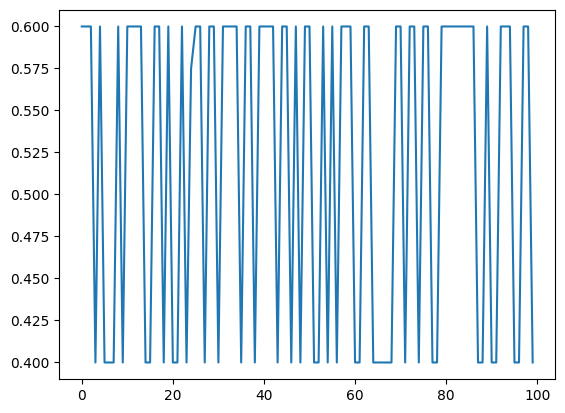

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## Applying Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

In [21]:
X_test_scaled

array([[-0.84826272,  0.40218125],
       [-1.62050759, -1.57325199],
       [-0.07601785, -0.48234109],
       [-0.84826272,  0.16630863],
       [ 1.56500249,  0.01888824],
       [ 0.88928823, -1.45531567],
       [-1.42744637,  0.37269718],
       [-0.94479333, -1.10150673],
       [ 0.21357397, -0.27595254],
       [-0.17254846,  1.66999662],
       [-1.33091576, -1.36686344],
       [-1.52397698, -1.24892713],
       [-0.5586709 ,  1.40463991],
       [ 0.69622701,  0.28424494],
       [-0.26907907, -0.30543662],
       [-0.46214029, -0.77718187],
       [-1.8135688 ,  0.01888824],
       [ 2.14418614, -0.80666595],
       [ 1.46847188,  0.07785639],
       [-1.13785454, -0.77718187],
       [-0.07601785,  0.25476086],
       [ 0.69622701, -0.71821372],
       [-0.75173211, -0.21698439],
       [-0.17254846, -1.07202266],
       [-1.23438515,  0.31372902],
       [ 0.69622701, -1.10150673],
       [ 0.69622701, -1.39634752],
       [ 0.21357397, -0.36440478],
       [ 0.5996964 ,

<Axes: >

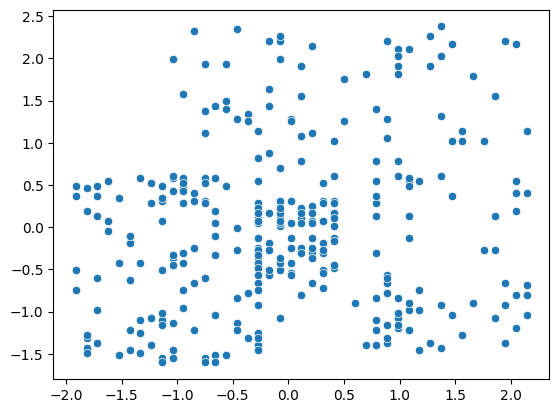

In [22]:
sns.scatterplot(x = X_train_scaled[:,0],y= X_train_scaled[:,1])

In [23]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 48ms/step - loss: 0.7150 - accuracy: 0.5063 - val_loss: 0.6893 - val_accuracy: 0.5625
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6579 - accuracy: 0.6562 - val_loss: 0.6303 - val_accuracy: 0.7125
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6101 - accuracy: 0.7406 - val_loss: 0.5801 - val_accuracy: 0.8125
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5678 - accuracy: 0.8125 - val_loss: 0.5382 - val_accuracy: 0.8000
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.5318 - accuracy: 0.8250 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4981 - accuracy: 0.8531 - val_loss: 0.4672 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4683 - accuracy: 0.8687 - val_loss: 0.4374 - val_accuracy: 0.8125
Epoch 

10/10 [==============================] - 0s 12ms/step - loss: 0.2398 - accuracy: 0.9031 - val_loss: 0.2662 - val_accuracy: 0.8875
Epoch 59/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2396 - accuracy: 0.9000 - val_loss: 0.2637 - val_accuracy: 0.9375
Epoch 60/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2394 - accuracy: 0.9000 - val_loss: 0.2621 - val_accuracy: 0.9375
Epoch 61/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2388 - accuracy: 0.9031 - val_loss: 0.2635 - val_accuracy: 0.9375
Epoch 62/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2386 - accuracy: 0.9031 - val_loss: 0.2644 - val_accuracy: 0.9375
Epoch 63/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2384 - accuracy: 0.9062 - val_loss: 0.2647 - val_accuracy: 0.9250
Epoch 64/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2381 - accuracy: 0.9031 - val_loss: 0.2625 - val_accuracy: 0.9375
Epoch 65/100

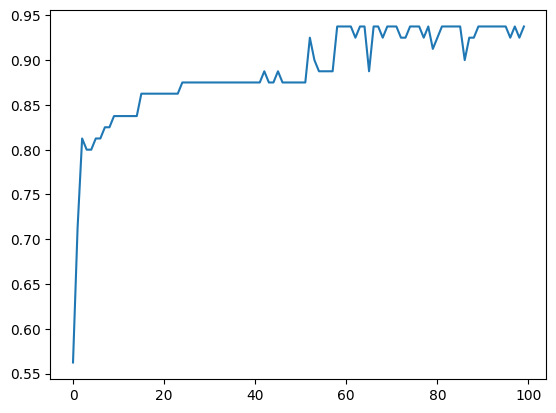

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])